<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

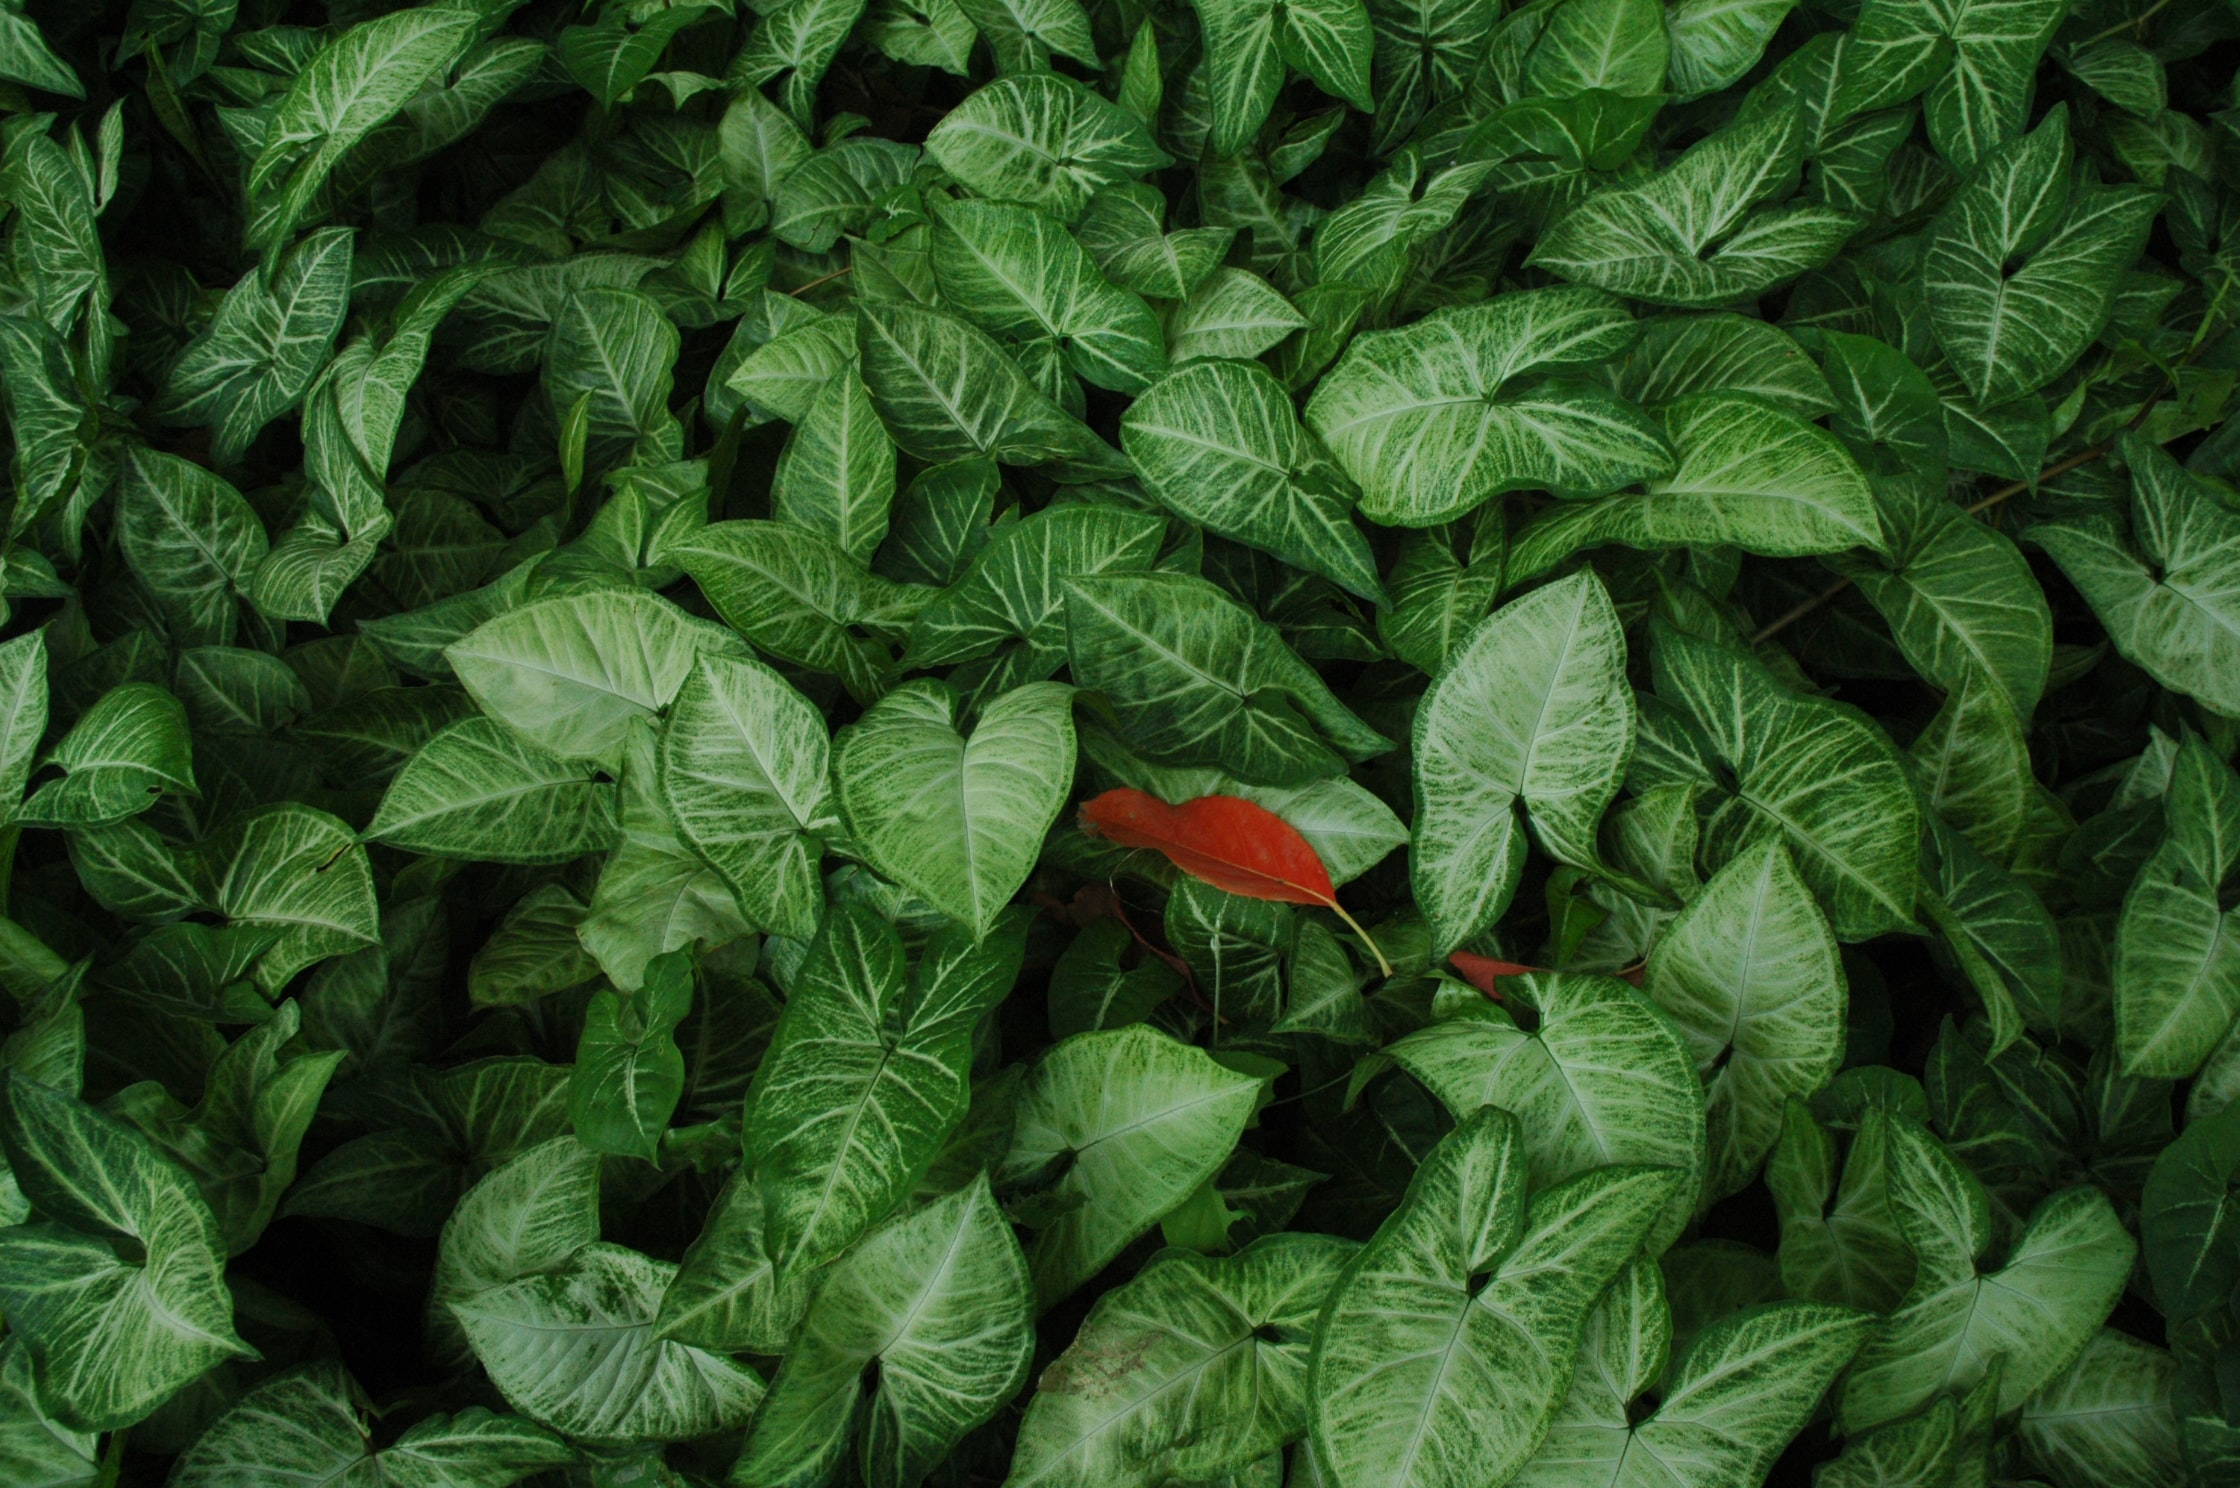[Image Source](https://unsplash.com/@ineka)

## Table of Content
- **<a href="#2.2">Handling Outliers</a>**
  - **<a href="#2.2.1">Univariate method</a>**
    - **<a href="#1.">Data is Normally Distributed / Gaussian Distributed</a>**
    - **<a href="#2.">Data is Skewed</a>**
  - **<a href="#2.2.2">Multivariate method</a>**
  - **<a href="#2.2.3">Minkowski error</a>**
- **<a href="#2.2_">Machine Learning Models Sensitivity towards Outliers</a>**
  

<a id="2.2"></a>
## 2.2 Handling Outliers
- Data outliers can mislead and indulge the training operation which results less accurate models and longer training period.
- Depending upon the problem statement and context, the outlier deserves some attention.

**Examples**
- Titanic dataset where our target is to detect whether the person is survived or not. Here we can remove the outliers.
- Credit card fraud detection, here we should keep the outliers
- In sales forecasting, here we should keep the outliers

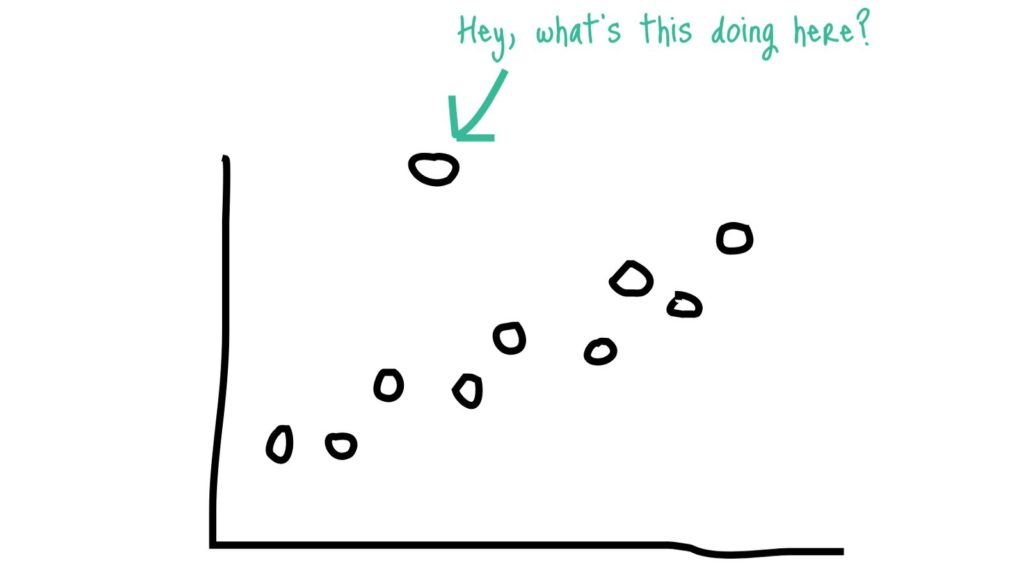[Image Source](https://www.datajango.com/outliers-in-machine-learning/)


**Here, we present three different methods to deal with outliers:**
- **Univariate method:** It search on one variable for data points which have extreme values.
- **Multivariate method:** In this process we inspect for unusual patterns of all the variables.
- **Minkowski error:** This method is used to reduces the influence of existing outliers in the training phase.

>**Note:** There are several machine learning algorithm which are sensitive towards outliers, so its required to apply any of these above mentioned technique to deal with outliers before training process.

<a id="2.2.1"></a>
### 2.2.1 Univariate method
- The box plot can be used to check the presence of outliers in a variable. Box plots use the median, the lower and upper quartiles.

***In Univariate method two scenarios is possible:***
   1. **Data is Normally Distributed / Gaussian Distributed**
   2. **Data is Skewed**

In [1]:
'''For univariate method analysis we will consider the titanic dataset, 
which is commanly available in Kaggle'''

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

data=pd.read_csv('Datasets/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
## Checking null value in 'Age' column
data['Age'].isnull().sum()

177

In [3]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<a id="1."></a>
#### 1. Data is Normally Distributed / Gaussian Distributed

Text(0.5, 1.0, 'Histogram plot while dropping nan')

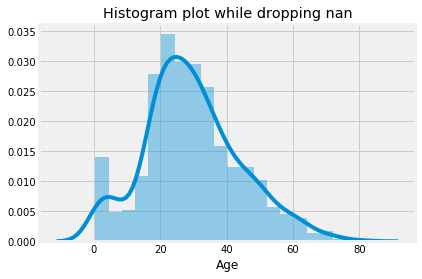

In [4]:
## As we got null value, so here we apply outliers in missing values
import seaborn as sns

fig1=sns.distplot(data['Age'].dropna())
fig1.set_title('Histogram plot while dropping nan')


Data is normally distributed 

Text(0.5, 1.0, 'Histogram plot while filling outliers in nan place')

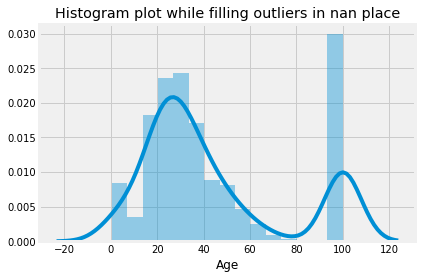

In [5]:
fig2=sns.distplot(data['Age'].fillna(100))
fig2.set_title('Histogram plot while filling outliers in nan place')

>**Note:** If dataset is small we can fill the missinig values, refer section of handling missing values

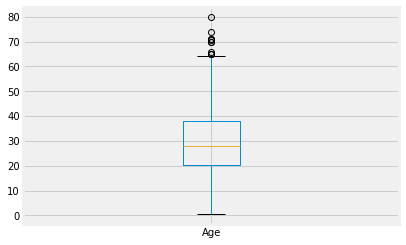

In [6]:
## Checking Outliers using box plot
data.boxplot(column="Age")

As we know our data is normally distributed, so we will calculate the boundaries which differentiates the outliers.

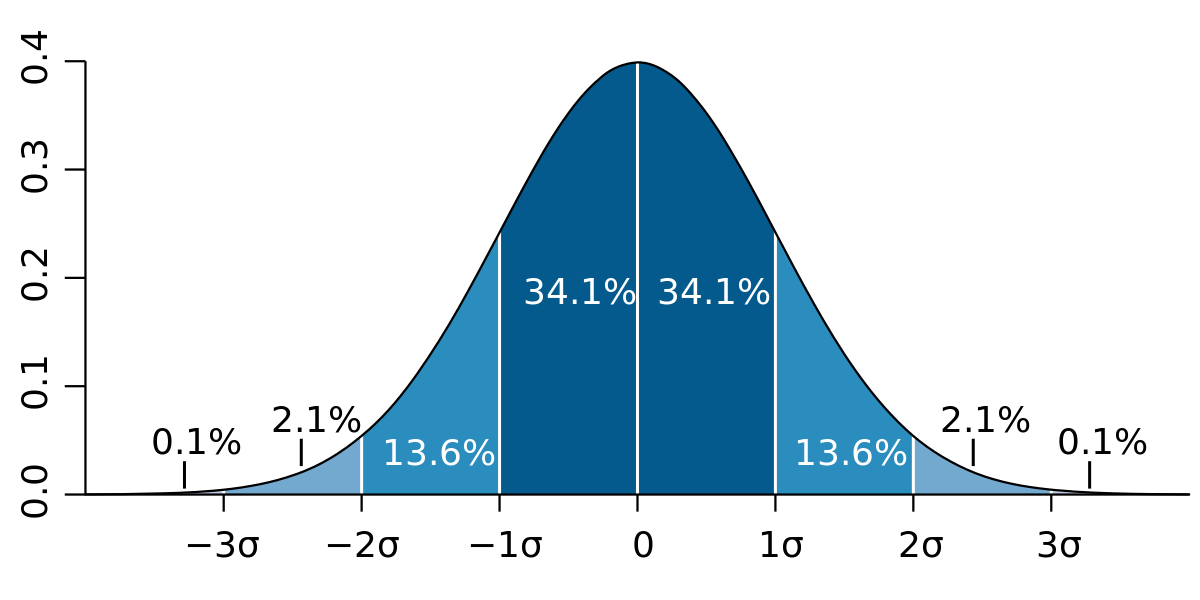
[Source](https://en.wikipedia.org/wiki/Standard_deviation)

Based upon this diagram $3 * standard deviation$ will cover 99.7 % value, similar approach has applied down there

In [7]:
## We need to compute the lower and upper boundary first
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
upper_boundary=data['Age'].mean() + 3* data['Age'].std()

## Mean calculation
mean=data['Age'].mean()
print(f'lower boundary:{lower_boundary} \nUpper boundary:{upper_boundary},\nMean:{mean}')

lower boundary:-13.88037434994331 
Upper boundary:73.27860964406095,
Mean:29.69911764705882


In [8]:
## As we got upper boundary 73, if values are greater than 73 will replaced to 73
## Age value is not lesser than lower boundary, so no need to apply it
data.loc[data['Age']>=73,'Age']=73

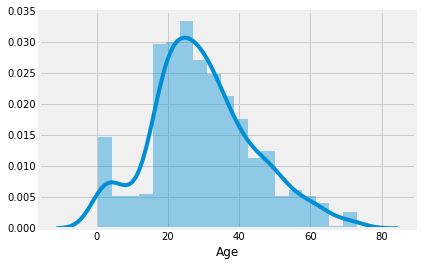

In [9]:
sns.distplot(data['Age'].dropna())

In [10]:
data.Age.describe()

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

<a id="2."></a>
#### 2. Data is Skewed

Text(0, 0.5, 'No of passenger')

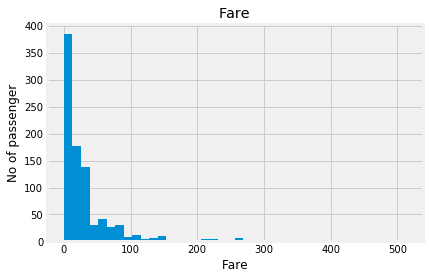

In [11]:
figure=data.Fare.hist(bins=40)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Considering `Fare` column, we can say the data is right skewed. So for `Skewed` data we can apply **`IQR (Interquantile range)`** method.

In [12]:
## Computing the IQR to calculate the boundaries
IQR=data.Fare.quantile(0.75)-data.Fare.quantile(0.25)

In [13]:
## Mid outliers (IQR *1.5)
lower_level=data['Fare'].quantile(0.25)-(IQR*1.5)
upper_level=data['Fare'].quantile(0.75)+(IQR*1.5)
print(f'lower boundary:{lower_level} \nUpper boundary:{upper_level}')

lower boundary:-26.724 
Upper boundary:65.6344


In [14]:
## Extreme outliers (IQR *3)
lower_level=data['Fare'].quantile(0.25)-(IQR*3)
upper_level=data['Fare'].quantile(0.75)+(IQR*3)
print(f'lower boundary:{lower_level} \nUpper boundary:{upper_level}')

lower boundary:-61.358399999999996 
Upper boundary:100.2688


In [15]:
## As we got upper boundary 100, if values are greater than 100 will replaced to 100
## Fare value is not lesser than lower boundary, so no need to apply it
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

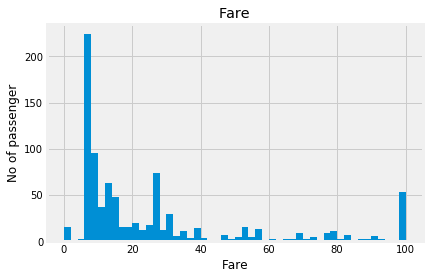

In [16]:
## Histogram plot after replacing outliers
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

>**Note:** Similar approach can be applied on left skewed data

<a id="2.2.2"></a>
### 2.2.2 Multivariate method
The multivariate method tries to solve that by building a predictive model using all the data available and cleaning those instances with errors above a given value. [Source](https://www.neuraldesigner.com/blog/3_methods_to_deal_with_outliers)

<a id="2.2.3"></a>
### 2.2.3 Minkowski error

`Minkowski error` is consider to be the loss index which is less sensitive towards the outliers than the standard MSE (mean squared error).

The MSE compute each instance error by taking square, so it provide big outliers contribution to the total error,

$$MSE = ∑(predicted-orignal)^2 / number of instances$$

The Minkowski error solves through considering smaller value than 2 at each instance. This considered number is called Minkowski parameter, and help to reduces the effect of outliers on total error,

$$MinkowskiError = ∑(predicted-orignal)^{m} / number of instances$$

`m` is minkowski_parameter and 1.5 is considered to be the common value for the Minkowski parameter.

For example, if an outlier has error value of 10, so the squared error for this will be $10^2=100$, while the Minkowski error is 
$10^{1.5}=31.62$
.

<a id="2.2_"></a>
## Machine Learning Models Sensitivity towards Outliers

Knowledge about machine learning models sensitivity towards Outliers is very much important for implementation point of view.
Here is list of some popular machine learning model and their respective sensitivity towards the outliers.

|Algorithms|Sensitivity towards outliers|
|-|-|
|Naive Bayes Classifier|Not Sensitive to Outliers (It computed based upon probablity)|
|SVM|Not Sensitive to Outliers (SVF formula doesn’t affected by outliers) |       
|Linear Regression|Sensitive to Outliers|
|Logistic Regression|Sensitive to Outliers|
|Decision Tree Regressor or Classifier|Not Sensitive|
|Ensemble (GB, RF and XGBoost) |Not Sensitive|
|KNN|Not Sensitive |
|Kmeans|Sensitive|
|Hierarchal|Sensitive |
|PCA|Sensitive |
|Neural Networks| Sensitive|

>**Note:** It's always recommended to check the outliers before appling any algorithm on training data.